# Videos
___

In [1]:
from __future__ import unicode_literals
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
import common.videos

In [2]:
#config
reload(sys)
sys.setdefaultencoding('utf-8')
matplotlib.style.use('ggplot')
%matplotlib inline

#constants
VIDEO_DATA_DIRECTORY = '/home/marcel/Development/rbtvdata/video'

## Video Daten
___

In [3]:
#load video data
videos, videosHosts, videosShows = common.videos.load(VIDEO_DATA_DIRECTORY)

## Alle Videos
___

In [4]:
videos

,title,channel,length,published,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
id,,,,,,,,,
3Xpqz0wRh5A,54 72 61 75 65 72,Rocket Beans TV,00:00:15,2015-03-03 01:00:00,30711,661,12,0,145
jlxYZf7dVGY,Schröcks Fernsehgarten | 03.03.2015,Rocket Beans TV,00:11:21,2015-03-03 07:30:01,3577,203,1,0,21
yMnl0OEPef0,#MoinMoin mit Tim | 03.03.2015,Rocket Beans TV,00:42:54,2015-03-03 14:00:01,30567,1881,119,0,326
zJR2VMT1NTc,Wir müssen reden | 02.03.2015 | feat. Hauke | (1),Rocket Beans TV,00:25:05,2015-03-03 18:00:04,29194,878,10,0,65
AvZeGrEOqgs,Retro Klub # 5 | (2),Rocket Beans TV,00:25:51,2015-03-03 18:30:00,12050,237,5,0,5
HhAYKm1VQq0,Wir müssen reden | 02.03.2015 | feat. Hauke | (2),Rocket Beans TV,00:25:44,2015-03-03 18:30:00,17528,587,6,0,75
FpTMaodmRc0,Wir müssen reden | 02.03.2015 | feat. Hauke | (3),Rocket Beans TV,00:25:14,2015-03-03 19:00:00,15657,579,7,0,54
duwJcLC6Y7U,Rocket Beans TV: Let's Play Reloaded,Rocket Beans TV Let's Play,00:01:12,2015-03-03 19:55:53,418314,1412,13,0,71
p3KDSKs7Hog,Hinweis - RBTV Let's Play Kanal,Rocket Beans TV,00:00:38,2015-03-03 19:59:12,81108,3548,18,0,324


## Alle Hosts
___

In [5]:
hosts = pd.DataFrame(sorted(videosHosts['host'].unique()), columns=['host'])

hosts

,host
0,Alwin
1,Andi
2,Andreas
3,Anja
4,Arno
5,Bell
6,Ben
7,Blitz
8,Budi
9,Charly


## Alle Formate
___

In [6]:
shows = pd.DataFrame(sorted(videosShows['show'].unique()), columns=['show'])

shows

,show
0,1on1
1,After Dark
2,Almost Daily
3,Almost Plaily
4,Baking Bad
5,Beans On Rice
6,Beans vs
7,Bohn Jour
8,Bohndesliga
9,Buch Klub


## Filtern nach Moderator
___

In [7]:
host = 'Eddy'
videoIds = videosHosts[videosHosts['host'] == host].index.unique().tolist()
videosFiltered = videos[videos.index.isin(videoIds)]

videosFiltered

,title,channel,length,published,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
id,,,,,,,,,
Ht_6yKRTIag,Road To Division One | (13),Rocket Beans TV Let's Play,00:26:54,2015-03-05 11:00:00,9580,292,2,0,16
c4tD3JRYSug,Road To Division One | (14),Rocket Beans TV Let's Play,00:37:16,2015-03-05 11:30:01,7652,216,3,0,17
Fu7odZditz4,Road To Division One | (15),Rocket Beans TV Let's Play,00:43:33,2015-03-05 12:00:00,8920,237,1,0,15
cf5nUvLro74,#MoinMoin mit Etienne | 11.03.2015,Rocket Beans TV,00:44:47,2015-03-11 14:22:01,38338,1511,7,0,182
QyFkZURG_ac,Super Metroid | Classix | #10 | 11.03.2015,Rocket Beans TV Let's Play,00:25:31,2015-03-12 16:00:01,10380,278,5,0,19
PUC2ZrzDWic,Super Metroid | Classix | #11 | 11.03.2015,Rocket Beans TV Let's Play,00:24:09,2015-03-12 16:30:01,10253,265,4,0,24
6LgoVDPNH9s,Gadget Inspectors | MASH Machine,Rocket Beans TV,00:07:10,2015-03-12 19:00:00,56064,3195,28,0,253
EqKodtbGY_I,Kino+ #50 (1/2) | Steven Gätjen | Kingsman: Th...,Rocket Beans TV,00:57:15,2015-03-12 22:00:00,97599,3763,15,0,264
6koLt0kIZDg,Kino+ #50 (2/2) | Steven Gätjen | News | Best ...,Rocket Beans TV,00:57:29,2015-03-12 22:30:00,74695,2747,9,0,244


## Filtern nach Moderatoren (OR)
___

In [8]:
hosts = ('Budi', 'Eddy', 'Arno', 'Nils', 'Simon')
videoIds = videosHosts[videosHosts['host'].isin(hosts)].index.unique().tolist()
videosFiltered = videos[videos.index.isin(videoIds)]

videosFiltered

,title,channel,length,published,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
id,,,,,,,,,
fQ8ApCS_cSI,Classix | Fahrenheit (11),Rocket Beans TV Let's Play,00:35:07,2015-03-04 11:07:12,7530,225,3,0,13
92e_d5WtOl0,Classix | Fahrenheit (12),Rocket Beans TV Let's Play,00:31:53,2015-03-04 11:07:32,6981,244,2,0,24
UiBTiTA-G3Y,Classix | Zak McKracken (6),Rocket Beans TV Let's Play,00:30:52,2015-03-04 16:04:36,5282,150,0,0,7
USRLrmZ0w_o,Classix | Zak McKracken (7),Rocket Beans TV Let's Play,00:32:04,2015-03-04 16:04:58,4366,147,1,0,2
eNRPuO_tPHM,Classix | Zak McKracken (8),Rocket Beans TV Let's Play,00:32:31,2015-03-04 16:05:28,4226,184,0,0,13
KgqLS7zB9sA,Classix | Zak McKracken (5),Rocket Beans TV Let's Play,00:43:26,2015-03-04 16:05:59,5651,159,0,0,5
CPSZgl_W82w,#MoinMoin mit Budi | 04.03.2015,Rocket Beans TV,00:44:27,2015-03-04 17:01:44,26516,1096,9,0,95
0FHPnx1c1I4,Almost Plaily #140 | Montagsmaler #9,Rocket Beans TV,00:44:54,2015-03-04 18:00:01,83642,2519,17,0,314
Fqqj2F98OJk,Community Beef | Battlefield 4 | (1),Rocket Beans TV Let's Play,00:37:52,2015-03-04 22:00:01,12513,281,7,0,30


## Filtern nach Moderatoren (AND)
___

In [9]:
hosts = ('Budi', 'Eddy', 'Nils', 'Simon')
videoHostsFiltered = videosHosts[videosHosts['host'].isin(hosts)]
videoHostsFiltered = videoHostsFiltered.groupby(level=0)
videoHostsFiltered = videoHostsFiltered.filter(lambda group: len(group) == len(hosts))
videoIds = videoHostsFiltered.index.unique().tolist()

videosFiltered = videos[videos.index.isin(videoIds)]

videosFiltered

,title,channel,length,published,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
id,,,,,,,,,
XYe-DGeNnRg,Pen & Paper | T.E.A.R.5. | Pre-Show #1 | 13.03...,Rocket Beans TV,00:27:10,2015-03-14 15:00:04,166207,2609,9,0,123
0DxhFE1Tp1Q,Pen & Paper | T.E.A.R.5. | Pre-Show #2 | 13.03...,Rocket Beans TV,00:16:09,2015-03-14 15:30:00,88098,1656,7,0,72
TZhCr3kC2Ec,Pen & Paper | T.E.A.R.S. | #5 | Part 1 | Das g...,Rocket Beans TV,00:35:45,2015-03-14 16:00:00,187545,3206,20,0,151
wSqJFUMwkEA,Pen & Paper | T.E.A.R.S. | #5 | Part 2 | Das g...,Rocket Beans TV,00:26:14,2015-03-14 16:30:01,154165,2475,6,0,113
QItNR-fGxro,Pen & Paper | T.E.A.R.S. | #5 | Part 3 | Das g...,Rocket Beans TV,00:28:35,2015-03-14 17:00:01,154176,2525,14,0,177
F_FiGqqBUjY,Pen & Paper | T.E.A.R.S. | #5 | Part 4 | Das g...,Rocket Beans TV,00:26:52,2015-03-14 17:30:00,154540,2554,9,0,100
0yfniZ-1vEw,Pen & Paper | T.E.A.R.S. | #5 | Part 5 | Das g...,Rocket Beans TV,00:31:25,2015-03-14 18:00:01,153056,2518,8,0,120
Sw6296rhU8o,Pen & Paper | T.E.A.R.S. | #5 | Part 7 | Das g...,Rocket Beans TV,00:34:37,2015-03-14 19:00:01,153207,4937,21,0,380
nExZ0TdghGw,Pen & Paper | T.E.A.R.S. | #5 | Part 6 | Das g...,Rocket Beans TV,00:35:09,2015-03-14 19:05:57,158376,2863,12,0,191


## Filtern nach Format
___

In [10]:
show = 'Bohn Jour'
videoIds = videosShows[videosShows['show'] == show].index.unique().tolist()
videosFiltered = videos[videos.index.isin(videoIds)]

videosFiltered

,title,channel,length,published,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
id,,,,,,,,,
aYvIOKstN5E,Bohn Jour #9 | (1/3) | 04.03.2015,Rocket Beans TV,00:35:09,2015-03-07 18:00:00,39064,1123,8,0,98
v2sLZfAPt9w,Bohn Jour #9 | (2/3) | 04.03.2015,Rocket Beans TV,00:24:11,2015-03-07 18:30:01,27715,807,2,0,28
eXE5Sk5c75M,Bohn Jour #9 | (3/3) | 04.03.2015,Rocket Beans TV,00:39:25,2015-03-07 19:00:03,27936,1176,6,0,94
KYGcOdfC408,Bohn Jour #10 | (1/3) | 12.03.2015,Rocket Beans TV,00:35:13,2015-03-15 18:00:01,40323,1348,3,0,132
PzREL6iMzRQ,Bohn Jour #10 | (2/3) | 12.03.2015,Rocket Beans TV,00:36:57,2015-03-15 18:30:00,30680,1011,3,0,59
gWpSobvlzsA,Bohn Jour #10 | (3/3) | 12.03.2015,Rocket Beans TV,00:23:47,2015-03-15 19:00:00,22812,819,2,0,59
cbQW3W2i5oQ,Bohn Jour #11 | feat. Jochen Dominicus | (1/3)...,Rocket Beans TV,00:31:24,2015-03-18 23:32:55,52593,1783,8,0,165
dZLHzqSvpr0,Bohn Jour #11 | feat. Jochen Dominicus | (2/3)...,Rocket Beans TV,00:34:38,2015-03-19 00:11:17,48627,1645,6,0,159
St0fthmOf1w,Bohn Jour #11 | feat. Jochen Dominicus | (3/3)...,Rocket Beans TV,00:24:09,2015-03-19 00:27:29,43515,1807,9,0,150


## Filtern nach Formaten (OR)
___

In [11]:
shows = ('Bohn Jour', 'News')
videoIds = videosShows[videosShows['show'].isin(shows)].index.unique().tolist()
videosFiltered = videos[videos.index.isin(videoIds)]

videosFiltered

,title,channel,length,published,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
id,,,,,,,,,
aYvIOKstN5E,Bohn Jour #9 | (1/3) | 04.03.2015,Rocket Beans TV,00:35:09,2015-03-07 18:00:00,39064,1123,8,0,98
v2sLZfAPt9w,Bohn Jour #9 | (2/3) | 04.03.2015,Rocket Beans TV,00:24:11,2015-03-07 18:30:01,27715,807,2,0,28
eXE5Sk5c75M,Bohn Jour #9 | (3/3) | 04.03.2015,Rocket Beans TV,00:39:25,2015-03-07 19:00:03,27936,1176,6,0,94
KYGcOdfC408,Bohn Jour #10 | (1/3) | 12.03.2015,Rocket Beans TV,00:35:13,2015-03-15 18:00:01,40323,1348,3,0,132
PzREL6iMzRQ,Bohn Jour #10 | (2/3) | 12.03.2015,Rocket Beans TV,00:36:57,2015-03-15 18:30:00,30680,1011,3,0,59
gWpSobvlzsA,Bohn Jour #10 | (3/3) | 12.03.2015,Rocket Beans TV,00:23:47,2015-03-15 19:00:00,22812,819,2,0,59
cbQW3W2i5oQ,Bohn Jour #11 | feat. Jochen Dominicus | (1/3)...,Rocket Beans TV,00:31:24,2015-03-18 23:32:55,52593,1783,8,0,165
dZLHzqSvpr0,Bohn Jour #11 | feat. Jochen Dominicus | (2/3)...,Rocket Beans TV,00:34:38,2015-03-19 00:11:17,48627,1645,6,0,159
St0fthmOf1w,Bohn Jour #11 | feat. Jochen Dominicus | (3/3)...,Rocket Beans TV,00:24:09,2015-03-19 00:27:29,43515,1807,9,0,150


## Filtern nach Formaten (AND)
___

In [12]:
shows = ('MoinMoin', '[Event] Gamescom 2016')
videoShowsFiltered = videosShows[videosShows['show'].isin(shows)]
videoShowsFiltered = videoShowsFiltered.groupby(level=0)
videoShowsFiltered = videoShowsFiltered.filter(lambda group: len(group) == len(shows))
videoIds = videoShowsFiltered.index.unique().tolist()

videosFiltered = videos[videos.index.isin(videoIds)]

videosFiltered

,title,channel,length,published,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
id,,,,,,,,,
anCznEJ19vs,gamescom 2016 | MoinMoin mit Krogmann & Max | ...,Rocket Beans TV,00:47:22,2016-08-16 12:31:12,35012,1123,33,0,171
WalHDdfpT0A,gamescom 2016 | MoinMoin mit Budi | Simon im T...,Rocket Beans TV,00:48:06,2016-08-18 13:17:06,18512,456,17,0,59
si5MssAbw90,gamescom 2016 | MoinMoin mit Budi & Etienne | ...,Rocket Beans TV,00:47:12,2016-08-19 13:15:06,26876,794,40,0,229
iqKLS4nJE78,"gamescom 2016 | MoinMoin mit Budi, Tim, Gino &...",Rocket Beans TV,00:50:00,2016-08-20 13:43:14,20793,518,15,0,78
Yyf_wbMsbyw,"gamescom 2016 | MoinMoin mit Budi, Simon, Nils...",Rocket Beans TV,01:14:33,2016-08-21 13:46:14,22832,652,12,0,163


## Hauptbohnen
___

In [13]:
hosts = ('Budi', 'Eddy', 'Nils', 'Simon')
videoIds = videosHosts[videosHosts['host'].isin(hosts)].index.unique().tolist()
videosFiltered = videos[videos.index.isin(videoIds)]

videosGrouped = videosFiltered.groupby([videosFiltered['published'].dt.year, videosFiltered['published'].dt.month])

videosGrouped = videosGrouped.size().to_frame('videos')

videosGrouped

videos
published published        
2015      3             225
          4             152
          5             188
          6             136
          7             186
          8             210
          9             182
          10            212
          11            241
          12            143
2016      1             225
          2             191
          3             211
          4             205
          5             205
          6             185
          7             187
          8             228
          9             164
          10             30

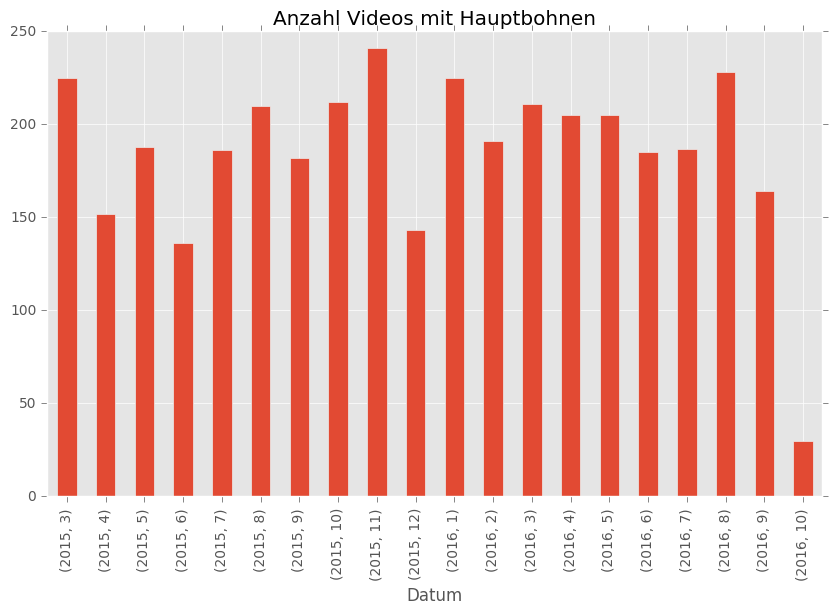

In [14]:
plot = videosGrouped.plot(kind='bar', figsize=(10, 6), legend=False, title='Anzahl Videos mit Hauptbohnen')
plot.set_xlabel('Datum')

plt.ylim(ymin=0)

plot